In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\kaggle\medical\insurance.xlsx")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

univariate analysis

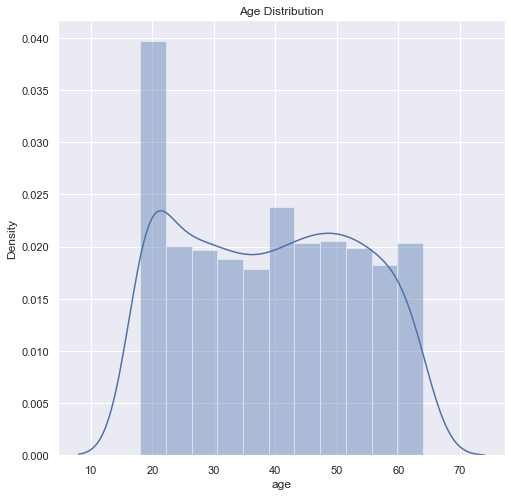

In [10]:
#age column
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [11]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

20-65 age group for primary benfeciary and mostly 20 year age group have primary beneficary of insurance

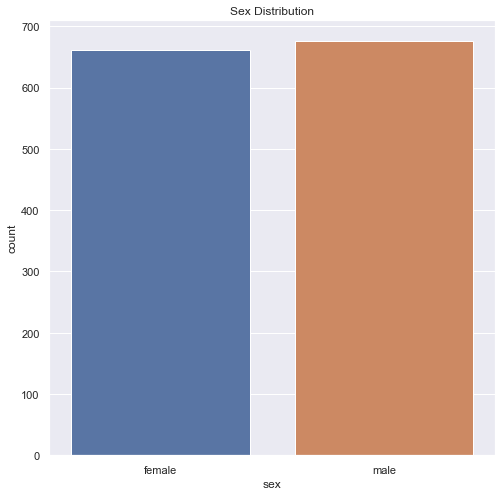

male      676
female    662
Name: sex, dtype: int64

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()
df['sex'].value_counts()

676 male and 662 females are insurance contractor

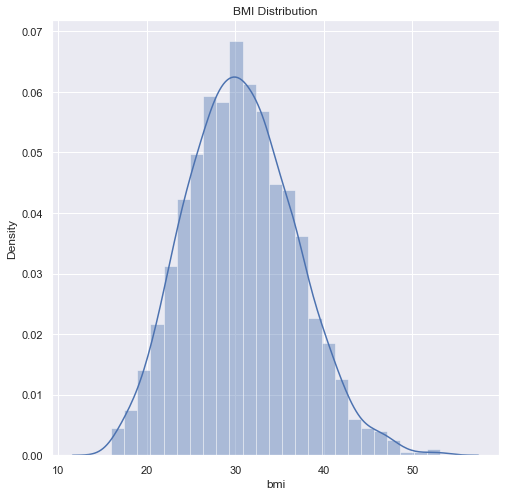

In [13]:
#bmi column
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

normal bmi range is 18.5 to 24.9 but very low range of people have normal bmi 

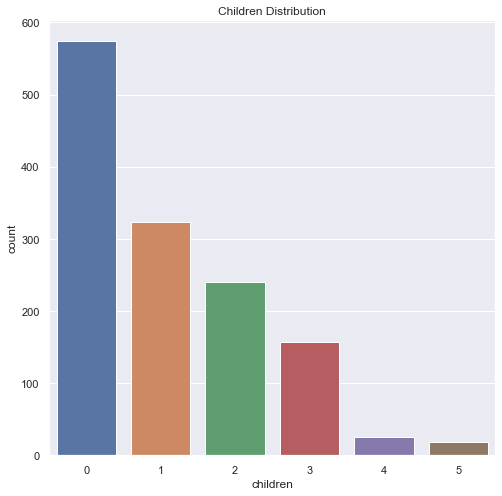

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
#children column
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=df)
plt.title('Children Distribution')
plt.show()
df['children'].value_counts()

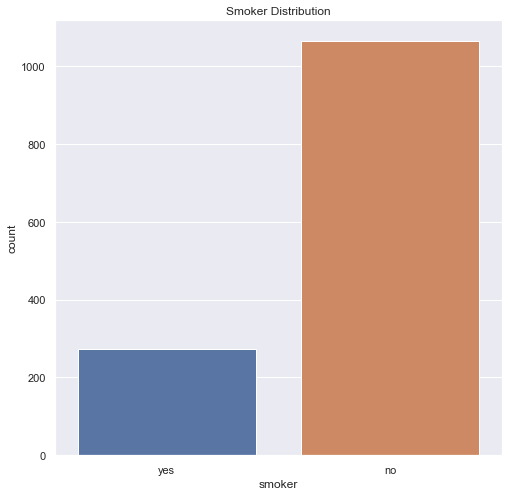

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
#smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')
plt.show()
df['smoker'].value_counts()

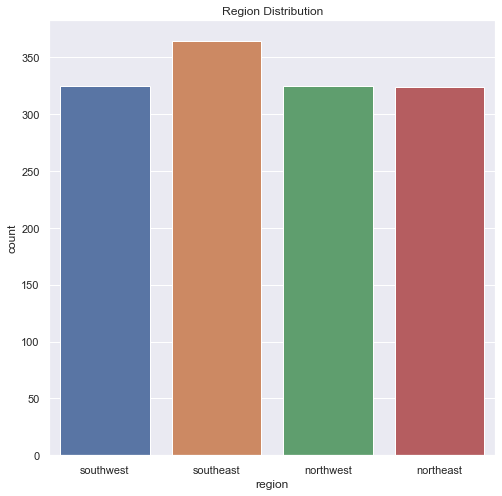

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
#region column
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()
df['region'].value_counts()

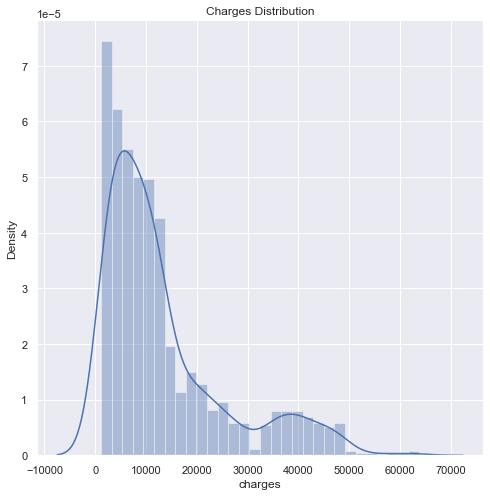

In [17]:
#charges column
plt.figure(figsize=(8,8))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

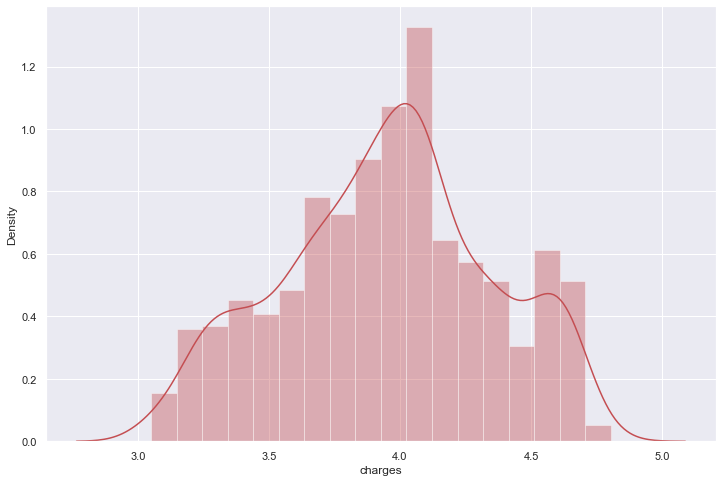

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Bivariate analysis

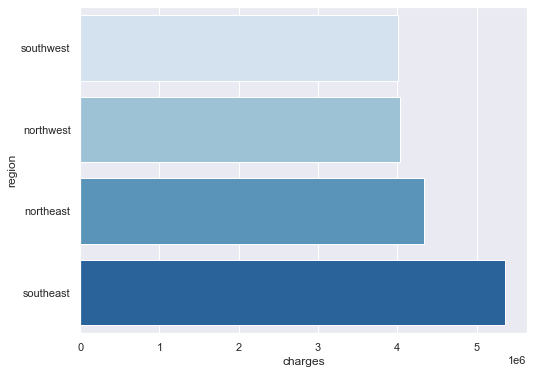

In [19]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

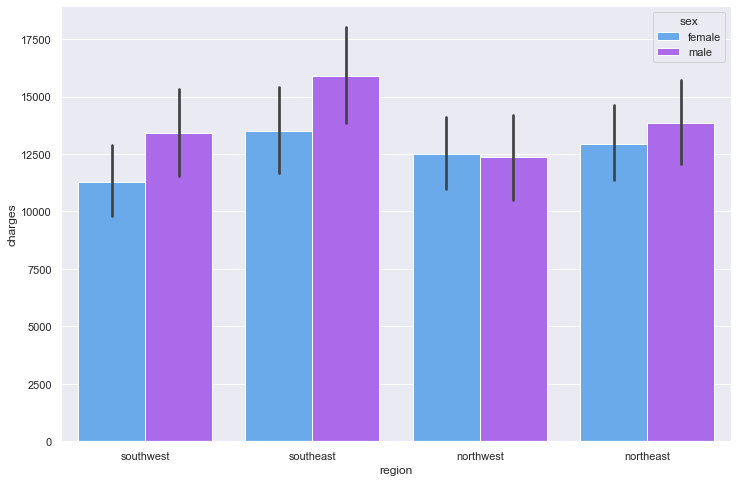

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

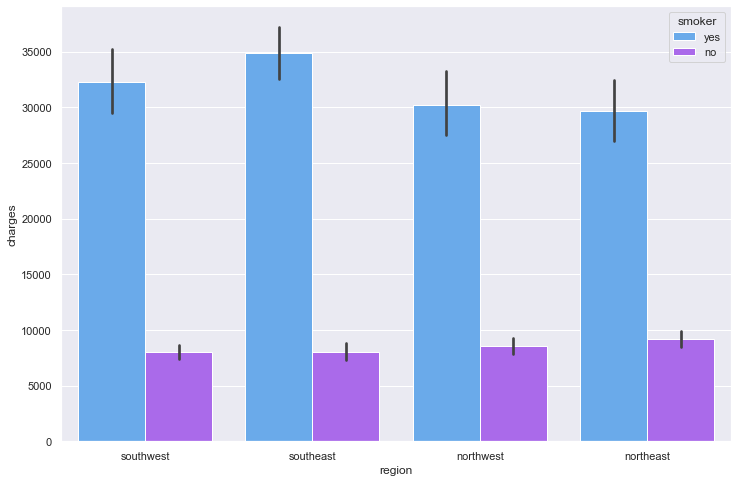

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='cool')

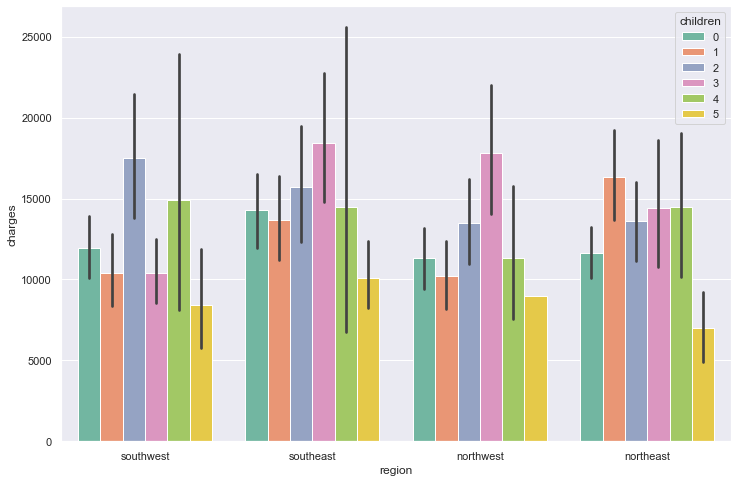

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')

In [23]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
                   
#encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
                   
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)  

In [24]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [26]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1070, 6) (1070,) (268, 6) (268,)


In [27]:
lr= LinearRegression()
lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)
print(lr.score(x_test, y_test))

10498.11806006515
[   256.60696538    253.40215821    337.88386685    549.0591983
 -23670.00503151    351.45059774]
0.7772564555107725


In [28]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

10452.671703027972
[   256.54689468    248.87928799    337.8025932     549.19002079
 -23601.56140796    350.07272058]
0.777109470098816


In [29]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

10498.478647364083
[   256.60710822    252.51049557    337.86570897    548.91788252
 -23668.67222733    351.26606146]
0.7772572356705312


In [30]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(x_train_pred, y_train),
       metrics.r2_score(x_test_pred, y_test)))

MSE train data: 3434841.058, MSE test data: 21651267.762
R2 train data: 0.974, R2 test data: 0.817


In [31]:
##Predicting the charges
y_test_pred = Rfr.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
471,2203.47185,14046.454287
1250,18648.42170,25551.403560
1257,11305.93455,15492.065937
139,2166.73200,2104.651410
919,5245.22690,5318.353508
488,48885.13561,42483.878459
691,8068.18500,9666.886279
159,19749.38338,11177.205644
1239,3238.43570,7435.600254
779,9869.81020,12252.917261
